In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import matplotlib.pyplot as plt
import torchvision
import numpy as np
# from tqdm.autonotebook import tqdm
from tqdm import tqdm


In [2]:
# # Importing for model related work
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torchvision import datasets, transforms
# from torch.utils.data import Dataset, DataLoader
# from torchsummary import summary
# import torchvision


# # Numpy matplotlib and pandas 
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

In [3]:

# For training set 
# Making the tensor and normalizing the data
train_set = torchvision.datasets.MNIST(
    root='./data',  # creating directory and giving the path
    train=True,     # True for training set
    download=True,  # True if data is not available in local storage
    transform=transforms.Compose([
        transforms.ToTensor(), # convert image to tensor
        transforms.Normalize((0.1307,), (0.3081,)) # Normalize image with mean and standard deviation
    ])
)

# For testing set
# Making the tensor and normalizing the data
test_set = torchvision.datasets.MNIST(
    root='./data',    #  giving the directory path
    train=False,      # False for testing set
    transform=transforms.Compose([
        transforms.ToTensor(),  # convert image to tensor
        transforms.Normalize((0.1307,), (0.3081,))   # Normalize image with mean and standard deviation
    ])
)

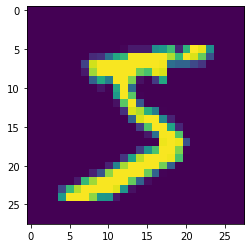

In [4]:
img, _ = train_set[0]
plt.imshow(img.numpy().squeeze())

In [5]:
len(torch.randint(0,10, (len(train_set),1), dtype=torch.float))

60000

In [6]:

class Get_Numbers(Dataset):
  def __init__(self, data):
    self.data = data  # Giving tensor of downloaded data
    self.numbers = torch.randint(0, 10,(len(self.data),1), dtype=torch.float) # Generating a tensor containing random number (from 0-10) of size of data

  def __getitem__(self, index):
    r = self.data[index]    # Accessing item using index
    image, label = r
    num = self.numbers[index] # Accessing generated number of same image
    sum = num + label  # Initializing the sum 
    return image, num, label, sum   # Returning the image, random number, label and sum of label and random number

  def __len__(self):
    return len(self.data) # Getting number of attribute in dataset

tensor([9.]) 2 tensor([11.])


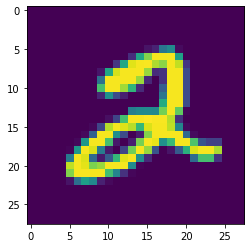

In [7]:
x = Get_Numbers(train_set)

img, label, rand, sum = x.__getitem__(5)

plt.imshow(img.numpy().squeeze()),
print(label, rand, sum)
plt.show()


In [8]:
# train loader and test loader
batch_size=128
use_cuda = torch.cuda.is_available() # GPU enabled
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader = DataLoader(Get_Numbers(train_set), # Putting the training set in Numbers class and getting the image label sum and random number
                          batch_size, shuffle=True, **kwargs)
test_loader = DataLoader(Get_Numbers(test_set), #Putting the test set in Numbers class and getting the image label sum and random number
                         batch_size, shuffle=True,  **kwargs)


In [9]:

# # train loader and test loader
# batch_size=128
# use_cuda = torch.cuda.is_available() # GPU enabled
# kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

# train_loader = DataLoader(Get_Mnist(train_set), # Putting the training set in Numbers class and getting the image label sum and random number
#                           batch_size, shuffle=True, **kwargs)
# test_loader = DataLoader(Get_Mnist(test_set), #Putting the test set in Numbers class and getting the image label sum and random number
#                          batch_size, shuffle=True, **kwargs)

In [10]:
len(train_loader)

469

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


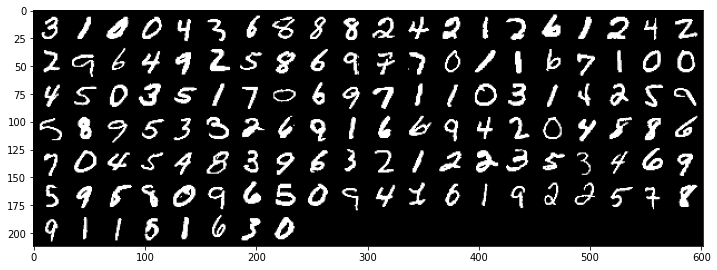

In [11]:
batch = next(iter(train_loader))

img, label, num, sum = batch
# img, label = batch

grid = torchvision.utils.make_grid(img, nrow=20)
plt.figure(figsize=(12,20))
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()

In [12]:
print(label.reshape(-1,))
print(num[:10].reshape(-1,))
print(sum[:10].reshape(-1,))

tensor([2., 3., 2., 4., 9., 5., 7., 2., 7., 5., 4., 0., 0., 7., 4., 0., 0., 7.,
        4., 2., 2., 6., 1., 1., 6., 3., 2., 0., 2., 9., 4., 0., 9., 3., 0., 6.,
        2., 3., 8., 2., 5., 4., 6., 7., 7., 6., 1., 4., 5., 7., 1., 1., 5., 7.,
        9., 3., 5., 3., 9., 0., 7., 3., 9., 7., 9., 6., 9., 7., 6., 3., 0., 5.,
        6., 1., 9., 7., 9., 8., 3., 9., 5., 6., 3., 6., 7., 0., 8., 1., 2., 1.,
        9., 4., 6., 0., 3., 7., 6., 4., 3., 0., 7., 2., 5., 4., 7., 1., 6., 8.,
        2., 5., 1., 8., 7., 2., 8., 7., 2., 8., 0., 4., 6., 8., 7., 2., 7., 1.,
        1., 2.])
tensor([3, 1, 0, 0, 4, 3, 6, 8, 8, 8])
tensor([ 5.,  4.,  2.,  4., 13.,  8., 13., 10., 15., 13.])


In [13]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         # For processing the Image
#         self.conv1 = nn.Conv2d(1, 32, 3, padding=1)    # input: 28x28x1, output: 28x28x32, RF: 3x3
#         self.conv2 = nn.Conv2d(32, 64, 3, padding=1)   # input: 28x28x32, output: 28x28x64, RF: 5x5
#         # The max pooling layer
#         self.pool1 = nn.MaxPool2d(2, 2)   # input: 14x14x64, output: 14x14x64, RF: 10x10
#         self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # input: 14x14x64, output: 14x14x128, RF: 12x12
#         self.conv4 = nn.Conv2d(128, 256, 3, padding=1) # input: 14x14x128, output: 14x14x256, RF: 14x14
#         # The max pooling layer
#         self.pool2 = nn.MaxPool2d(2, 2)   # input: 7x7x256, output: 7x7x256, RF: 28x28
#         self.conv5 = nn.Conv2d(256, 512, 3)    # input: 7x7x256, output: 5x5x512, RF: 30x30
#         self.conv6 = nn.Conv2d(512, 1024, 3)   # input: 5x5x512, output: 3x3x1024, RF: 32x32
#         self.conv7 = nn.Conv2d(1024, 10, 3)    # input: 3x3x1024, output: 1x1x10, RF: 34x34
        

#         # For processing the random number
#         # 5 linear layers for adding the numbers
#         # We use danse layer to proccess numerical number
#         self.dense1 = nn.Linear(1, 8)   # One input neuron connected with 8 output neurons
#         self.dense2 = nn.Linear(8, 32)  # 8 input neurons connected with 32 output neurons
#         self.dense3 = nn.Linear(32 + 10, 128)   # 32 neuron comes form dense1 & dense2 and 10 neurons comes from convolutions connected with 128 output neurons
#         self.dense4 = nn.Linear(128, 256)    # 128 neurons connected with 256 neurons
#         self.dense5 = nn.Linear(256, 1)    # 256 neurons connected with 1 final neuron 

#     def forward(self, x, num):
#         x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))   # Convolving input image twice and then applying relu 
#         x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))   # as an activation function and doing max pooling
#         x = F.relu(self.conv6(F.relu(self.conv5(x))))
#         x = self.conv7(x)
#         x = x.view(-1, 10)
#         out_1 = F.log_softmax(x)   # Computing probabilitic representation of each class

#         num = F.relu(self.dense1(num))  # ReLU as an activation function on dense1
#         num = F.relu(self.dense2(num))  # ReLU as an activation function on dense2

#         out_2 = torch.cat((x, num), dim=1)    # Concatinating num and x(network of MNIST dataset)
#         out_2 = F.relu(self.dense3(out_2))
#         out_2 = F.relu(self.dense4(out_2))
#         out_2 = self.dense5(out_2)
        
#         return out_1, out_2

In [14]:
class Net(nn.Module):
  def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)    #28x28x1 | 3x3x1x32 |  28x28x32 | RF 3x3
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)   #28x28x32 | 3x3x32x64 |  28x28x64 | RF 5x5
        self.pool1 = nn.MaxPool2d(2, 2)                #28x28x64 | Maxpool |  14x14x64 | RF 10x10
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1) #14x14x64 | 3x3x64x128 |  14x14x128 | RF 12x12
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)#14x14x128 | 3x3x128x256 |  14x14x128 | RF 14x14
        self.pool2 = nn.MaxPool2d(2, 2)               #14x14x256 | Maxppol |  7x7x256 | RF 28x28
        self.conv5 = nn.Conv2d(256, 512, 3)           #7x7x256 | 3x3x256x512 |  5x5x512 | RF 30x30
        self.conv6 = nn.Conv2d(512, 1024, 3)          #5x5x512 | 3x3x512x1024 |  3x3x1024 | RF 32x32
        self.conv7 = nn.Conv2d(1024, 10, 3)           #3x3x1024 | 3x3x1024x10 |  1x1x10 | RF 34x34

        self.dense1 = nn.Linear(1,8) # take the random number as neuron and convert it to 8 hidden layer. 
        self.dense2 = nn.Linear(8,32)
        self.dense3 = nn.Linear(10+32, 64) # takes in concat of Mnist convolution output (10 neurons) and 10 neurons from the previous dense1
        self.dense4 = nn.Linear(64,128)
        self.dense5 = nn.Linear(128,1) # final neuron 

  def forward(self, x, num):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))) 
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        x = self.conv7(x)
        x = x.view(-1, 10)
        out_1 = F.log_softmax(x)
        
        num = F.relu(self.dense1(num))
        num = F.relu(self.dense2(num))
        out_2 = torch.cat((out_1, num), dim=1) # concat the neurons with number with convolution output. 
        out_2 = F.relu(self.dense3(out_2))
        out_2 = F.relu(self.dense4(out_2))
        out_2 = self.dense5(out_2)
        return out_1, out_2


In [15]:
Net()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(1024, 10, kernel_size=(3, 3), stride=(1, 1))
  (dense1): Linear(in_features=1, out_features=8, bias=True)
  (dense2): Linear(in_features=8, out_features=32, bias=True)
  (dense3): Linear(in_features=42, out_features=64, bias=True)
  (dense4): Linear(in_features=64, out_features=128, bias=True)
  (dense5): Linear(in_features=128, out_features=1, bias=True)
)

In [16]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
# summary(model, input_size=[(1, 28, 28),(1,)])

In [17]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()   # training the model
    pbar = tqdm(train_loader)    # For progressbar visualization

    # Calling batch one by one
    for batch_idx, (data, num, label, sum) in enumerate(pbar):

        data, num, label, sum = data.to(device), num.to(device), label.to(device), sum.to(device)
        label = label.reshape(-1,)
        optimizer.zero_grad()    # set the gradients to zero before starting to do backpropragation

        pred_label, pred_sum = model(data, num)  # Predicted label and Predicted sum

        loss1 = F.nll_loss(pred_label, label)   # Calculating loss for label of image
        loss2 = F.mse_loss(pred_sum, sum)   # Calculating loss for sum of random number and label
        loss = loss1 + loss2  # calculating the final loss

        loss.backward() # Back propogation
        optimizer.step()   #  makes the optimizer iterate over all parameters (tensors)

        pbar.set_description(desc= f'Total_loss={loss.item()} sum_loss: {loss2.item()}batch_id={batch_idx}')

# For testing set
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, num, label, sum in test_loader:
            data, num, label, sum = data.to(device), num.to(device), label.to(device), sum.to(device)
            label = label.reshape(-1,)
            pred_label, pred_sum = model(data, num) # Predicted output (label and sum of label and random number)

            # Calculating loss for label and random number of test
            test_loss += F.nll_loss(pred_label, label, reduction='sum').item() + F.mse_loss(pred_sum, sum, reduction='sum').item() # sum up batch loss
            # Predicted output
            pred = pred_label.argmax(dim=1, keepdim=True)  # returns maximum value of all elements in the input tensor
            correct += pred.eq(label.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [18]:
# from tqdm import tqdm
# def train(model, device, train_loader, optimizer, epoch):
#     model.train()
#     pbar = tqdm(train_loader)
#     for batch_idx, (data, target, num, sum) in enumerate(pbar):
#         data, target, num, sum = data.to(device), target.to(device), num.to(device), sum.to(device)
#         # target = target.reshape(-1,)
#         optimizer.zero_grad()
#         pred_label, pred_sum = model(data, num)
#         loss1 = F.nll_loss(pred_label, target)
#         loss2 = F.mse_loss(pred_sum, sum)

#         loss = loss1 + loss2
#         loss.backward()
#         optimizer.step()
#         pbar.set_description(desc= f'loss1 = {loss1.item()} loss2= {loss2.item()} loss={loss.item()} batch_id={batch_idx}')


# def test(model, device, test_loader):
#     model.eval()
#     test_loss = 0
#     correct = 0
#     with torch.no_grad():
#         for data, target, num, sum in test_loader:
#             data, target, num, sum = data.to(device), target.to(device), num.to(device), sum.to(device)
#             target = target.reshape(-1,)
#             pred_img, pred_sum = model(data, sum)
#             test_loss += F.nll_loss(pred_img, target, reduction='sum').item() + \
#                          F.mse_loss(pred_sum, target, reduction='sum').item() # sum up batch loss
#             pred = pred_img.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     test_loss /= len(test_loader.dataset)

#     print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))

In [19]:
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)     # optimization technique for gradient descent

# Defining the epoch and iterating through epochs
for epoch in range(1, 10):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Total_loss=0.616551399230957 sum_loss: 0.46386680006980896batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6577, Accuracy: 9672/10000 (96.72%)



Total_loss=0.5188513398170471 sum_loss: 0.4315773844718933batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3876, Accuracy: 9796/10000 (97.96%)



Total_loss=0.07447697222232819 sum_loss: 0.05936392396688461batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2754, Accuracy: 9847/10000 (98.47%)



Total_loss=0.15988726913928986 sum_loss: 0.14619342982769012batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3104, Accuracy: 9870/10000 (98.70%)



Total_loss=0.06862325966358185 sum_loss: 0.05991394445300102batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2200, Accuracy: 9910/10000 (99.10%)



Total_loss=0.093112513422966 sum_loss: 0.0854494720697403batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1864, Accuracy: 9900/10000 (99.00%)



Total_loss=0.1970316469669342 sum_loss: 0.16511520743370056batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1814, Accuracy: 9915/10000 (99.15%)



Total_loss=0.04912014305591583 sum_loss: 0.04332011193037033batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1570, Accuracy: 9922/10000 (99.22%)



Total_loss=0.24195775389671326 sum_loss: 0.20693522691726685batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.11it/s]



Test set: Average loss: 0.1515, Accuracy: 9928/10000 (99.28%)



In [34]:

# model = Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# for epoch in range(1, 3):
#     train(model, device, train_loader, optimizer, epoch)
#     test(model, device, test_loader)


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


RuntimeError: ignored

In [20]:

im , lab = next(iter(test_set))  # Accessing image and label from test dataset
im = im.to(device)   # Sending image to GPU
num = torch.tensor([5], dtype=torch.float).unsqueeze(0).to(device)   # creating batch
pred, sum =  model(im.unsqueeze(0), num)   # Adding 1 dimension w.r.t. row (creating a batch)
print("predtion", pred.argmax().item(), "\nsum of pred and number", sum.item(), f'\n actual Sum: {(lab+num).item()}')
# im.shape
# num.item()

predtion 7 
sum of pred and number 11.88044261932373 
 actual Sum: 12.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


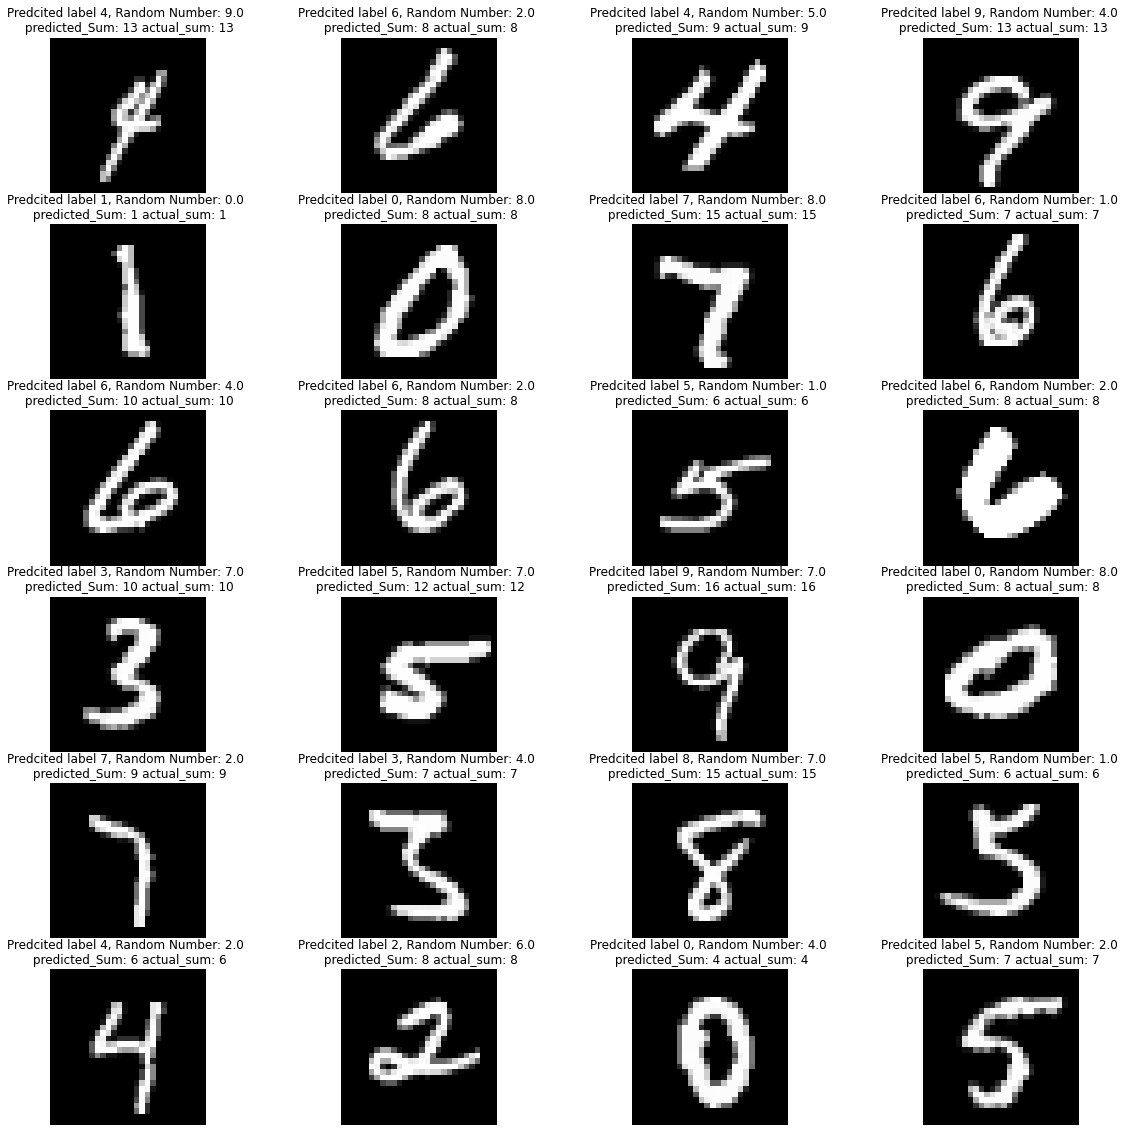

In [26]:
cols, rows = 4,6
figure = plt.figure(figsize=(20, 20))
for i in range(1, cols * rows + 1):
    k = np.random.randint(0, len(test_set))
    num = np.random.randint(0, 10)
    num = torch.tensor([num], dtype=torch.float).unsqueeze(0).to(device)

    img, label = test_set[k]
    img = img.unsqueeze(0)
    pred_lab, pred_sum =  model(img.to(device), num.to(device))

    figure.add_subplot(rows, cols, i)
    plt.title(f"Predcited label {pred_lab.argmax().item()}, Random Number: {num.item()} \n predicted_Sum: {round(pred_sum.item())} actual_sum: {int(label+num)}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()